
# Numerical Python (numpy)


## Introduction
Provides
  1. An array object of arbitrary homogeneous items
  2. Fast mathematical operations over arrays
  3. Linear Algebra, Fourier Transforms, Random Number Generation


In [3]:
import numpy as np

# Arrays (Matrices)

The core of the `numpy` library is the `array`. An `array` is like a python `list` except that it is homogeneous (all members are same type), the type is always numeric, it has built in support for multiple dimensions, methods for fast computation and *matrix* operations. 

In [12]:
A = np.mat('1 2 3; 4 5 6') # np.mat matrix is a subclass of array

In [13]:
def print_info(a):
    print('number of elements:', a.size)
    print('number of dimensions:', a.ndim)
    print('shape:', a.shape)
    print('data type:', a.dtype)
    print('strides:', a.strides)
    print('flags:')
    print(a.flags)
    
print_info(A)

number of elements: 6
number of dimensions: 2
shape: (2, 3)
data type: int64
strides: (24, 8)
flags:
  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False


## dtype

The items within the array are homogeneous, that is, they are all of the same type.  The type of `numpy` array members  are not the standard python numerical types.  Hereus a list of the possible `numpy` types.

Type           | Description
---------------|--------------------------
bool  | Boolean true or false      
inti  | Platform integer (normally either int32 or int64)
int8 | Byte (-128 to 127)
int16 |Integer (-32768 to 32767)
int32 |Integer (-2 ** 31 to 2 ** 31 -1)
int64 |Integer (-2 ** 63 to 2 ** 63 -1)
uint8 |Unsigned integer (0 to 255)
uint16 |Unsigned integer (0 to 65535)
uint32 |Unsigned integer (0 to 2 ** 32 - 1)
uint64 |Unsigned integer (0 to 2 ** 64 - 1)
float16 |Half precision float: sign bit, 5 bits exponent, 10 bits mantissa
float32 |Single precision float: sign bit, 8 bits exponent, 23 bits mantissa
float64, or float |Double precision float: sign bit, 11 bits exponent, 52 bits mantissa
complex64,<br> complex128 or complex |Complex number, represented by two 64-bit floats (real and imaginary components)



## Creating numpy arrays

here are 5 general mechanisms for creating arrays:

   1. Conversion from other Python structures (e.g., lists, tuples)
   2. Intrinsic numpy array array creation objects (e.g., arange, ones, zeros, etc.)
   3. Reading arrays from disk, either from standard or custom formats
   4. Creating arrays from raw bytes through the use of strings or buffers
   5. Use of special library functions (e.g., random)

This section will not cover means of replicating, joining, or otherwise expanding or mutating existing arrays. Nor will it cover creating object arrays or structured arrays. Both of those are covered in their own sections.
Convert from array to list or tuple

### Converting Python array_like Objects to NumPy Arrays

In general, numerical data arranged in an array-like structure in Python can be converted to arrays through the use of the array() function. The most obvious examples are lists and tuples. See the documentation for array() for details for its use. Some objects may support the array-protocol and allow conversion to arrays this way. A simple way to find out if the object can be converted to a numpy array using array() is simply to try it interactively and see if it works! (The Python Way).

Examples:

In [12]:
import numpy as np
x = np.array([2,3,1,0])
x = np.array([2, 3, 1, 0])
x = np.array([[1,2.0],[0,0],(1+1j,3.)]) # note mix of tuple and lists,and types
x = np.array([[ 1.+0.j, 2.+0.j], [ 0.+0.j, 0.+0.j], [ 1.+1.j, 3.+0.j]])

### Intrinsic NumPy Array Creation

NumPy has built-in functions for creating arrays from scratch:

`zeros(shape)` will create an array filled with 0 values with the specified shape. The default `dtype` is `float64`.

In [13]:
np.zeros((2, 3)) 

array([[0., 0., 0.],
       [0., 0., 0.]])

`ones(shape)` will create an array filled with 1 values. It is identical to zeros in all other respects.

An Identity matrix of arbitrary size can be created:

In [14]:
np.identity(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

#### arange

`arange()` will create arrays with regularly incrementing values. Check the docstring for complete information on the various ways it can be used.

In [15]:
help(np.arange)

Help on built-in function arange in module numpy:

arange(...)
    arange([start,] stop[, step,], dtype=None)
    
    Return evenly spaced values within a given interval.
    
    Values are generated within the half-open interval ``[start, stop)``
    (in other words, the interval including `start` but excluding `stop`).
    For integer arguments the function is equivalent to the Python built-in
    `range` function, but returns an ndarray rather than a list.
    
    When using a non-integer step, such as 0.1, the results will often not
    be consistent.  It is better to use `numpy.linspace` for these cases.
    
    Parameters
    ----------
    start : number, optional
        Start of interval.  The interval includes this value.  The default
        start value is 0.
    stop : number
        End of interval.  The interval does not include this value, except
        in some cases where `step` is not an integer and floating point
        round-off affects the length of `out`.
   

 Try a few examples will be given below:

In [16]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [17]:
np.arange(2, 10, dtype=float)

array([2., 3., 4., 5., 6., 7., 8., 9.])

In [18]:
np.arange(2, 3, 0.1)

array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9])

#### linspace

Note that there are some subtleties regarding the last usage that the user should be aware of that are described in the arange docstring.

linspace() will create arrays with a specified number of elements, and spaced equally between the specified beginning and end values. 

In [19]:
help(np.linspace)

Help on function linspace in module numpy:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supported.
    
    Parameters
    ----------
    start : array_like
        The starting value of the sequence.
    stop : array_like
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that `stop` is excluded.  Note that the step
        size changes when `endpoint` is False.
    num : int, optional
        Number of samples to generate. Default is 50. Must be non-negative.
    endpoint : bool, optional
        If True, `stop` is

In [20]:
np.linspace(1., 4., 6)

array([1. , 1.6, 2.2, 2.8, 3.4, 4. ])

In [21]:
np.arange(1.,4.,.6)

array([1. , 1.6, 2.2, 2.8, 3.4])

The advantage of this creation function is that one can guarantee the number of elements and the starting and end point, which arange() generally will not do for arbitrary start, stop, and step values.

#### indices

indices() will create a set of arrays (stacked as a one-higher dimensioned array), one per dimension with each representing variation in that dimension. An example illustrates much better than a verbal description:

In [22]:
np.indices((3,3))

array([[[0, 0, 0],
        [1, 1, 1],
        [2, 2, 2]],

       [[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]]])

This is particularly useful for evaluating functions of multiple dimensions on a regular grid.

### Reading Arrays From Disk

This is presumably the most common case of large array creation. The details, of course, depend greatly on the format of data on disk and so this section can only give general pointers on how to handle various formats.
Standard Binary Formats

Various fields have standard formats for array data. The following lists the ones with known python libraries to read them and return numpy arrays (there may be others for which it is possible to read and convert to numpy arrays so check the last section as well)

 - HDF5: h5py
 - FITS: Astropy

Examples of formats that cannot be read directly but for which it is not hard to convert are those formats supported by libraries like PIL (able to read and write many image formats such as jpg, png, etc).

**CSV**

Comma Separated Value files (CSV) are widely used (and an export and import option for programs like Excel). There are a number of ways of reading these files in Python. There are CSV functions in Python and functions in pylab (part of matplotlib).

More generic ascii files can be read using the io package in scipy.

The `numpy.loadtxt` function expects by default a `tab` delimited file, to read a `CSV` file we set the delimiter and skip the heading row below.

In [17]:
pulsar_data = np.loadtxt('data/pulsar_stars.csv', skiprows=1, delimiter=',')

pulsar_data[:10]

array([[ 1.40562500e+02,  5.56837821e+01, -2.34571412e-01,
        -6.99648398e-01,  3.19983278e+00,  1.91104263e+01,
         7.97553179e+00,  7.42422249e+01,  0.00000000e+00],
       [ 1.02507812e+02,  5.88824300e+01,  4.65318154e-01,
        -5.15087909e-01,  1.67725752e+00,  1.48601457e+01,
         1.05764867e+01,  1.27393580e+02,  0.00000000e+00],
       [ 1.03015625e+02,  3.93416494e+01,  3.23328365e-01,
         1.05116443e+00,  3.12123746e+00,  2.17446687e+01,
         7.73582202e+00,  6.31719091e+01,  0.00000000e+00],
       [ 1.36750000e+02,  5.71784487e+01, -6.84146380e-02,
        -6.36238369e-01,  3.64297659e+00,  2.09592803e+01,
         6.89649891e+00,  5.35936607e+01,  0.00000000e+00],
       [ 8.87265625e+01,  4.06722254e+01,  6.00866079e-01,
         1.12349169e+00,  1.17892977e+00,  1.14687196e+01,
         1.42695728e+01,  2.52567306e+02,  0.00000000e+00],
       [ 9.35703125e+01,  4.66981135e+01,  5.31904850e-01,
         4.16721117e-01,  1.63628763e+00,  1.454507

In [18]:
print_info(pulsar_data)

number of elements: 161082
number of dimensions: 2
shape: (17898, 9)
data type: float64
strides: (72, 8)
flags:
  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False


In [19]:
import sys
sys.getsizeof(pulsar_data)

112

In [21]:
import sys
sys.getsizeof(pulsar_data[0,0])

32

In [24]:
sys.getsizeof(pulsar_data.tobytes())

1288689

In [28]:
x, y = pulsar_data.shape
x * y * 32

5154624

Compare with 9462051 of the list of lists approach

## Selection

### Selecting a row
The first row

In [29]:
pulsar_data[0]

array([140.5625    ,  55.68378214,  -0.23457141,  -0.6996484 ,
         3.19983278,  19.11042633,   7.97553179,  74.24222492,
         0.        ])

### A single element

In [30]:
pulsar_data[0,0]

140.5625

In [31]:
pulsar_data[0][0]

140.5625

### Slicing

First five rows

In [32]:
pulsar_data[0:5]

array([[ 1.40562500e+02,  5.56837821e+01, -2.34571412e-01,
        -6.99648398e-01,  3.19983278e+00,  1.91104263e+01,
         7.97553179e+00,  7.42422249e+01,  0.00000000e+00],
       [ 1.02507812e+02,  5.88824300e+01,  4.65318154e-01,
        -5.15087909e-01,  1.67725752e+00,  1.48601457e+01,
         1.05764867e+01,  1.27393580e+02,  0.00000000e+00],
       [ 1.03015625e+02,  3.93416494e+01,  3.23328365e-01,
         1.05116443e+00,  3.12123746e+00,  2.17446687e+01,
         7.73582202e+00,  6.31719091e+01,  0.00000000e+00],
       [ 1.36750000e+02,  5.71784487e+01, -6.84146380e-02,
        -6.36238369e-01,  3.64297659e+00,  2.09592803e+01,
         6.89649891e+00,  5.35936607e+01,  0.00000000e+00],
       [ 8.87265625e+01,  4.06722254e+01,  6.00866079e-01,
         1.12349169e+00,  1.17892977e+00,  1.14687196e+01,
         1.42695728e+01,  2.52567306e+02,  0.00000000e+00]])

Rows 5 and 6 columns 0, 1 and 2.

In [34]:
pulsar_data[5:7,:3]

array([[9.35703125e+01, 4.66981135e+01, 5.31904850e-01],
       [1.19484375e+02, 4.87650593e+01, 3.14602200e-02]])

### Fancy indexing

Rows 1, 20 and 30

In [35]:
pulsar_data[[1,20,30]]

array([[ 1.02507812e+02,  5.88824300e+01,  4.65318154e-01,
        -5.15087909e-01,  1.67725752e+00,  1.48601457e+01,
         1.05764867e+01,  1.27393580e+02,  0.00000000e+00],
       [ 1.00890625e+02,  5.18903945e+01,  6.27486528e-01,
        -2.64978020e-02,  3.88377926e+00,  2.30452667e+01,
         6.95316763e+00,  5.22794404e+01,  0.00000000e+00],
       [ 1.10109375e+02,  4.13181699e+01,  9.48603980e-02,
         6.83112610e-01,  1.01003344e+00,  1.30262752e+01,
         1.46665108e+01,  2.31204136e+02,  0.00000000e+00]])

## Oprations on Arrays

from http://www.scipy-lectures.org/intro/numpy/operations.html

### Elementwise operations
Basic operations

With scalars:

In [23]:
a = np.array([1, 2, 3, 4])
a + 1

array([2, 3, 4, 5])

In [24]:
2**a

array([ 2,  4,  8, 16])

All arithmetic operates elementwise:

In [25]:
b = np.ones(4) + 1
a - b

array([-1.,  0.,  1.,  2.])

In [26]:
a * b

array([2., 4., 6., 8.])

In [27]:
j = np.arange(5)
2**(j + 1) - j

array([ 2,  3,  6, 13, 28])

These operations are of course much faster than if you did them in pure python:

In [28]:
a = np.arange(10000)
%timeit a + 1  

3.91 µs ± 69.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [29]:
l = range(10000)
%timeit [i+1 for i in l] 

566 µs ± 13.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Array multiplication is not matrix multiplication:

In [37]:
c = np.ones((3, 3))
c * c                   # NOT matrix multiplication!

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

### Matrix multiplication:

In [38]:
c.dot(c)

array([[3., 3., 3.],
       [3., 3., 3.],
       [3., 3., 3.]])

In [39]:
c @ c

array([[3., 3., 3.],
       [3., 3., 3.],
       [3., 3., 3.]])

**Exercise: Elementwise operations**

  - Try simple arithmetic elementwise operations: add even elements with odd elements
  - Time them against their pure python counterparts using %timeit.
  - Generate:
       + [2**0, 2**1, 2**2, 2**3, 2**4]
       + a_j = 2^(3*j) - j

Other operations

### Comparisons:

In [32]:
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
a == b

array([False,  True, False,  True])

In [33]:
a > b

array([False, False,  True, False])

Array-wise comparisons:

In [34]:
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
c = np.array([1, 2, 3, 4])
np.array_equal(a, b)

False

In [35]:
np.array_equal(a, c)

True

Logical operations:

In [36]:
a = np.array([1, 1, 0, 0], dtype=bool)
b = np.array([1, 0, 1, 0], dtype=bool)
np.logical_or(a, b)

array([ True,  True,  True, False])

In [37]:
np.logical_and(a, b)

array([ True, False, False, False])

**Transcendental functions:**

In [40]:
a = np.arange(5)
np.sin(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ])

In [41]:
np.log(a)

/Users/markbadham/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


array([      -inf, 0.        , 0.69314718, 1.09861229, 1.38629436])

In [42]:
np.exp(a)

array([ 1.        ,  2.71828183,  7.3890561 , 20.08553692, 54.59815003])

Shape mismatches

In [43]:
a = np.arange(4)
a + np.array([1, 2])  

ValueError: operands could not be broadcast together with shapes (4,) (2,) 

Broadcasting? We’ll return to that later.

**Transposition:**

In [44]:
a = np.triu(np.ones((3, 3)), 1)   # see help(np.triu)
a

array([[0., 1., 1.],
       [0., 0., 1.],
       [0., 0., 0.]])

In [45]:
a.T

array([[0., 0., 0.],
       [1., 0., 0.],
       [1., 1., 0.]])

The transposition is a view

As a results, the following code is wrong and will not make a matrix symmetric:

In [46]:
a += a.T

It will work for small arrays (because of buffering) but fail for large one, in unpredictable ways.

### Basic reductions
Computing sums

In [47]:
x = np.array([1, 2, 3, 4])
np.sum(x)

10

In [48]:
x.sum()

10

![reductions.png](images/reductions.png)

Sum by rows and by columns:

In [47]:
x = np.array([[1, 1], [2, 2]])
x

array([[1, 1],
       [2, 2]])

In [48]:
x.sum(axis=0)   # columns (first dimension)

array([3, 3])

In [49]:
x[:, 0].sum(), x[:, 1].sum()

(3, 3)

In [50]:
x.sum(axis=1)   # rows (second dimension)

array([2, 4])

In [51]:
x[0, :].sum(), x[1, :].sum()

(2, 4)

### Other reductions

Extrema:

In [52]:
x = np.array([1, 3, 2])
x.min()

1

In [53]:
x.max()

3

In [54]:
x.argmin()  # index of minimum

0

In [55]:
x.argmax()  # index of maximum

1

### Logical operations:

In [56]:
np.all([True, True, False])

False

In [57]:
np.any([True, True, False])

True

**Can be used for array comparisons:**

In [58]:
a = np.zeros((100, 100))
np.any(a != 0)

False

In [59]:
np.all(a == a)

True

In [60]:
a = np.array([1, 2, 3, 2])
b = np.array([2, 2, 3, 2])
c = np.array([6, 4, 4, 5])

In [61]:
((a <= b) & (b <= c)).all()

True

### Statistics:

In [62]:
x = np.array([1, 2, 3, 1])
y = np.array([[1, 2, 3], [5, 6, 1]])
x.mean()

1.75

In [63]:
np.median(x)

1.5

In [64]:
np.median(y, axis=-1) # last axis

array([2., 5.])

In [65]:
x.std()          # full population standard dev.

0.82915619758885

**Exercise: Reductions**

 - Given there is a sum, what other function might you expect to see?
 - What is the difference between sum and cumsum?

Worked Example: data statistics

Data in [populations.txt](http://www.scipy-lectures.org/_downloads/populations.txt) describes the populations of hares and lynxes (and carrots) in northern Canada during 20 years.

You can view the data in an editor, or alternatively in IPython (both shell and notebook):

In [68]:
!head data/populations.txt

# year	hare	lynx	carrot
1900	30e3	4e3	48300
1901	47.2e3	6.1e3	48200
1902	70.2e3	9.8e3	41500
1903	77.4e3	35.2e3	38200
1904	36.3e3	59.4e3	40600
1905	20.6e3	41.7e3	39800
1906	18.1e3	19e3	38600
1907	21.4e3	13e3	42300
1908	22e3	8.3e3	44500


First, load the data into a NumPy array:

In [60]:
data = np.loadtxt('data/populations.txt')
year, hares, lynxes, carrots = data.T  # trick: columns to variables

Then plot it:

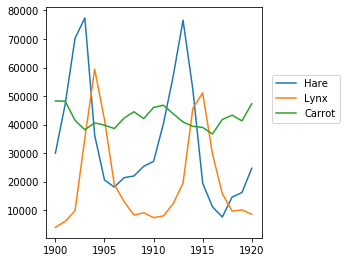

In [61]:
from matplotlib import pyplot as plt
plt.axes([0.2, 0.1, 0.5, 0.8]) 
plt.plot(year, hares, year, lynxes, year, carrots) 
plt.legend(('Hare', 'Lynx', 'Carrot'), loc=(1.05, 0.5))
plt.show()

The mean populations over time:

In [71]:
populations = data[:, 1:]
populations.mean(axis=0)

array([34080.95238095, 20166.66666667, 42400.        ])

The sample standard deviations:

In [72]:
populations.std(axis=0)

array([20897.90645809, 16254.59153691,  3322.50622558])

Which species has the highest population each year?:

np.argmax(populations, axis=1)

Worked Example: diffusion using a random walk algorithm
![random_walk.png](images/random_walk.png)

Let us consider a simple 1D random walk process: at each time step a walker jumps right or left with equal probability.

We are interested in finding the typical distance from the origin of a random walker after t left or right jumps? We are going to simulate many “walkers” to find this law, and we are going to do so using array computing tricks: we are going to create a 2D array with the “stories” (each walker has a story) in one direction, and the time in the other:
![random_walk_schema.png](images/random_walk_schema.png)

In [73]:
n_stories = 1000 # number of walkers
t_max = 200      # time during which we follow the walker

We randomly choose all the steps 1 or -1 of the walk:

In [74]:
t = np.arange(t_max)
steps = 2 * np.random.randint(0, 1 + 1, (n_stories, t_max)) - 1 # +1 because the high value is exclusive
np.unique(steps) # Verification: all steps are 1 or -1

array([-1,  1])

We build the walks by summing steps along the time:

In [76]:
positions = np.cumsum(steps, axis=1) # axis = 1: dimension of time
sq_distance = positions**2

We get the mean in the axis of the stories:

In [77]:
mean_sq_distance = np.mean(sq_distance, axis=0)

Plot the results:

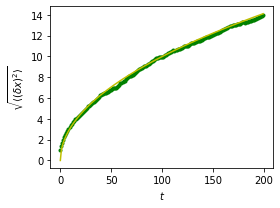

In [78]:
plt.figure(figsize=(4, 3)) 
plt.plot(t, np.sqrt(mean_sq_distance), 'g.', t, np.sqrt(t), 'y-') 
plt.xlabel(r"$t$") 
plt.ylabel(r"$\sqrt{\langle (\delta x)^2 \rangle}$") 
plt.tight_layout() # provide sufficient space for labels

We find a well-known result in physics: the RMS distance grows as the square root of the time!

## Broadcasting

Basic operations on numpy arrays (addition, etc.) are elementwise

This works on arrays of the same size.

 - Nevertheless, It’s also possible to do operations on arrays of different
 - sizes if NumPy can transform these arrays so that they all have
 - the same size: this conversion is called broadcasting.

The image below gives an example of broadcasting:

![Broadcasting](images/numpy_broadcasting.png)

Let’s verify:

In [79]:
a = np.tile(np.arange(0, 40, 10), (3, 1)).T
a

array([[ 0,  0,  0],
       [10, 10, 10],
       [20, 20, 20],
       [30, 30, 30]])

In [49]:
b = np.array([0, 1, 2])
a + b

array([[0., 2., 3.],
       [1., 1., 3.],
       [1., 2., 2.]])

We have already used broadcasting without knowing it!:

In [50]:
a = np.ones((4, 5))
a[0] = 2  # we assign an array of dimension 0 to an array of dimension 1
a

array([[2., 2., 2., 2., 2.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

An useful trick:

In [51]:
a = np.arange(0, 40, 10)
a.shape

(4,)

In [52]:
a = a[:, np.newaxis]  # adds a new axis -> 2D array
a.shape

(4, 1)

In [53]:
a

array([[ 0],
       [10],
       [20],
       [30]])

In [ ]:
a + b

Broadcasting seems a bit magical, but it is actually quite natural to use it when we want to solve a problem whose output data is an array with more dimensions than input data.

### Worked Example: Broadcasting

Let’s construct an array of distances (in miles) between cities of Route 66: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff and Los Angeles.

In [54]:
mileposts = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544,
       1913, 2448])
distance_array = np.abs(mileposts - mileposts[:, np.newaxis])
distance_array

array([[   0,  198,  303,  736,  871, 1175, 1475, 1544, 1913, 2448],
       [ 198,    0,  105,  538,  673,  977, 1277, 1346, 1715, 2250],
       [ 303,  105,    0,  433,  568,  872, 1172, 1241, 1610, 2145],
       [ 736,  538,  433,    0,  135,  439,  739,  808, 1177, 1712],
       [ 871,  673,  568,  135,    0,  304,  604,  673, 1042, 1577],
       [1175,  977,  872,  439,  304,    0,  300,  369,  738, 1273],
       [1475, 1277, 1172,  739,  604,  300,    0,   69,  438,  973],
       [1544, 1346, 1241,  808,  673,  369,   69,    0,  369,  904],
       [1913, 1715, 1610, 1177, 1042,  738,  438,  369,    0,  535],
       [2448, 2250, 2145, 1712, 1577, 1273,  973,  904,  535,    0]])

![Route 66](images/route66.png)

A lot of grid-based or network-based problems can also use broadcasting. For instance, if we want to compute the distance from the origin of points on a 10x10 grid, we can do

In [62]:
x, y = np.arange(5), np.arange(5)[:, np.newaxis]
distance = np.sqrt(x ** 2 + y ** 2)
distance

array([[0.        , 1.        , 2.        , 3.        , 4.        ],
       [1.        , 1.41421356, 2.23606798, 3.16227766, 4.12310563],
       [2.        , 2.23606798, 2.82842712, 3.60555128, 4.47213595],
       [3.        , 3.16227766, 3.60555128, 4.24264069, 5.        ],
       [4.        , 4.12310563, 4.47213595, 5.        , 5.65685425]])

Or in color:

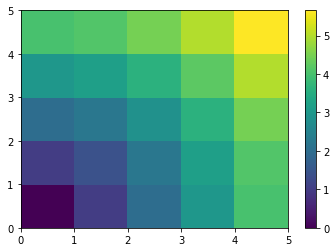

In [63]:
plt.pcolor(distance)    
plt.colorbar()    

Remark : the `numpy.ogrid()` function allows to directly create vectors x and y of the previous example, with two “significant dimensions”:

In [64]:
x, y = np.ogrid[0:5, 0:5]
x, y

(array([[0],
        [1],
        [2],
        [3],
        [4]]), array([[0, 1, 2, 3, 4]]))

In [65]:
x.shape, y.shape

((5, 1), (1, 5))

In [66]:
distance = np.sqrt(x ** 2 + y ** 2)

So, `p.ogrid` is very useful as soon as we have to ...

In [67]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a.ravel()

array([1, 2, 3, 4, 5, 6])

In [68]:
a.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [69]:
a.T.ravel()

array([1, 4, 2, 5, 3, 6])

Higher dimensions: last dimensions ravel out “first”.
Reshaping

The inverse operation to flattening:

In [70]:
a.shape

(2, 3)

In [71]:
b = a.ravel()
b = b.reshape((2, 3))
b

array([[1, 2, 3],
       [4, 5, 6]])

Or,

In [72]:
a.reshape((2, -1))    # unspecified (-1) value is inferred

array([[1, 2, 3],
       [4, 5, 6]])

ndarray.reshape may return a view (cf help(np.reshape))), or copy

### Adding a dimension

Indexing with the np.newaxis object allows us to add an axis to an array (you have seen this already above in the broadcasting section):

In [73]:
z = np.array([1, 2, 3])
z

array([1, 2, 3])

In [74]:
z[:, np.newaxis]

array([[1],
       [2],
       [3]])

In [75]:
z[np.newaxis, :]

array([[1, 2, 3]])

### Dimension shuffling

In [ ]:
a = np.arange(4*3*2).reshape(4, 3, 2)
a.shape

In [ ]:
a[0, 2, 1]

In [ ]:
b = a.transpose(1, 2, 0)
b.shape

In [ ]:
b[2, 1, 0]

Also creates a view:

In [ ]:
b[2, 1, 0] = -1
a[0, 2, 1]

### Resizing

Size of an array can be changed with ndarray.resize:

In [76]:
a = np.arange(4)
a.resize((8,))
a

array([0, 1, 2, 3, 0, 0, 0, 0])

However, it must not be referred to somewhere else:

In [77]:
b = a
a.resize((4,))   

ValueError: cannot resize an array that references or is referenced
by another array in this way.
Use the np.resize function or refcheck=False

**Exercise: Shape manipulations**

 - Look at the docstring for reshape, especially the notes section which has some more information about copies and views.
 - Use flatten as an alternative to ravel. What is the difference? (Hint: check which one returns a view and which a copy)
 - Experiment with transpose for dimension shuffling.

### Sorting data

Sorting along an axis:

In [78]:
a = np.array([[4, 3, 5], [1, 2, 1]])
b = np.sort(a, axis=1)
b

array([[3, 4, 5],
       [1, 1, 2]])

Note: Sorts each row separately!

In-place sort:

In [79]:
a.sort(axis=1)
a

array([[3, 4, 5],
       [1, 1, 2]])

Sorting with fancy indexing:

In [80]:
a = np.array([4, 3, 1, 2])
j = np.argsort(a)
j

array([2, 3, 1, 0])

In [81]:
a[j]

array([1, 2, 3, 4])

In [86]:
a = np.array([[4, 3, 5], [1, 2, 1]])
j = np.argsort(a[:,0],)
j

array([1, 0])

In [87]:
a[j]

array([[1, 2, 1],
       [4, 3, 5]])

### Finding minima and maxima:

In [82]:
a = np.array([4, 3, 1, 2])
j_max = np.argmax(a)
j_min = np.argmin(a)
j_max, j_min

(0, 2)

**Exercise: Sorting**

 - Try both in-place and out-of-place sorting.
 - Try creating arrays with different dtypes and sorting them.
 - Use all or array_equal to check the results.
 - Look at np.random.shuffle for a way to create sortable input quicker.
 - Combine ravel, sort and reshape.
 - Look at the axis keyword for sort and rewrite the previous exercise.

## Standard Linear Algebra operations

The sub-module numpy.linalg implements basic linear algebra, such as solving linear systems, singular value decomposition, etc. However, it is not guaranteed to be compiled using efficient routines, and thus we recommend the use of scipy.linalg, as detailed in section Linear algebra operations: scipy.linalg

**Exercise other operations**

   - Look at the help for np.allclose. When might this be useful?
   - Look at the help for np.triu and np.tril.

## Solving linear systems

In [ ]:
#create the matrices A and b .
A = np.mat("1 -2 1; 0 2 -8; -4 5 9")
print("A", A)
b = np.array([0, 8, -9])
print('b',b)

In [ ]:
# Solve this linear system by calling the solve function.
x = np.linalg.solve(A, b)
print ("Solution", x)

In [ ]:
#Check whether the solution is correct with the dot function.
print("Check\n", np.dot(A , x))

### Finding eigenvalues and eigenvectors
*Eigenvalues* are scalar solutions to the equation `Ax = ax`, where `A` is a two-dimensional
matrix and `x` is a one-dimensional vector. *Eigenvectors* are vectors corresponding to
eigenvalues. The `eigvals` function in the `numpy.linalg` package calculates eigenvalues.
The `eig` function returns a `tuple` containing eigenvalues and eigenvectors.

In [ ]:
#Eigenvals for A
np.linalg.eigvals(A)

# NumPy for MATLAB users

Time-stamp: "2007-11-09T16:46:36 vidar"
©2006 Vidar Bronken Gundersen, /mathesaurus.sf.net
Permission is granted to copy, distribute and/or modify this document as long as the above attribution is retained. 

### Help
    
  MATLAB/Octave|Python|Description
  -------------|------|-----------
  `doc` | `help()`|Browse help interactively                                                               
  `help help` [or] `doc doc`|`help`|Help on using help
  `help plot` | `help(plot)` [or] `?plot`   Help for a function
  `help splines` [or] `doc splines`  | `help(pylab)`|Help for a toolbox/library package
  `demo`| |Demonstration examples

### Searching available documentation

| MATLAB/Octave  | Python                      | Description             |
| -------------- | --------------------------- | ----------------------- |
| `lookfor plot` |                             | Search help files       |
| `help`         | `help(); modules [Numeric]` | List available packages |
| `which plot`   | `help(plot)`                | Locate functions        |

### Operators

| MATLAB/Octave | Python | Description             |
| ------------- | ------ | ----------------------- |
| `help -`      |        | Help on operator syntax |

### Arithmetic operators

Matlab/Octave|Python|Description
-------------|------|------------
`a .^ b` | `a ** b`| exponent $a^b$
rem(a,b) | `a % b`  or `fmod(a,b)`| Remainder

### Relational operators

| MATLAB/Octave | Python                                                    | Description           |
| ------------- | --------------------------------------------------------- | --------------------- |
| `a == b`      | `a == b` <span class="alt">or</span> `equal(a,b)`         | Equal                 |
| `a < b`       | `a < b` <span class="alt">or</span> `less(a,b)`           | Less than             |
| `a > b`       | `a > b` <span class="alt">or</span> `greater(a,b)`        | Greater than          |
| `a <= b`      | `a <= b` <span class="alt">or</span> `less_equal(a,b)`    | Less than or equal    |
| `a >= b`      | `a >= b` <span class="alt">or</span> `greater_equal(a,b)` | Greater than or equal |
| `a ~= b`      | `a != b` <span class="alt">or</span> `not_equal(a,b)`     | Not Equal             |

### Logical operators

  MATLAB/Octave|Python|Description
  -------------|------|-----------
  `a && b`|`a and b`|Short-circuit logical AND
  `a ││ b`|`a or b`|Short-circuit logical OR
  `a & b` or `and(a,b)`|`logical_and(a,b)` or `a and b` |Element-wise logical AND
  `a │ b` or `or(a,b)`|`logical_or(a,b)` or `a or b`|Element-wise logical OR
  `xor(a, b)`|`logical_xor(a,b)`|Logical EXCLUSIVE OR
  `~a` or `not(a)`|`logical_not(a)` or `not a`|Logical NOT
  `any(a)` | |True if any element is nonzero
  `all(a)` | |True if all elements are nonzero

### root and logarithm

| MATLAB/Octave | Python           | Description                   |
| ------------- | ---------------- | ----------------------------- |
| `sqrt(a)`     | `math.sqrt(a)`   | Square root                   |
| `log(a)`      | `math.log(a)`    | Logarithm, base $e$ (natural) |
| `log10(a)`    | `math.log10(a)`  | Logarithm, base 10            |
| `log2(a)`     | `math.log(a, 2)` | Logarithm, base 2 (binary)    |
| `exp(a)`      | `math.exp(a)`    | Exponential function          |



### Round off

| MATLAB/Octave | Python                                                  | Description        |
| ------------- | ------------------------------------------------------- | ------------------ |
| `round(a)`    | `around(a)` <span class="alt">or</span> `math.round(a)` | Round              |
| `ceil(a)`     | `ceil(a)`                                               | Round up           |
| `floor(a)`    | `floor(a)`                                              | Round down         |
| `fix(a)`      | `fix(a)`                                                | Round towards zero |

### Mathematical constants

| MATLAB/Octave | Python                                             | Description     |
| ------------- | -------------------------------------------------- | --------------- |
| `pi`          | `math.pi`                                          | $\\pi=3.141592$ |
| `exp(1)`      | `math.e` <span class="alt">or</span> `math.exp(1)` | $e=2.718281$    |

### Missing values; IEEE-754 floating point status flags

| MATLAB/Octave | Python       | Description          |
| ------------- | ------------ | -------------------- |
| `NaN`         | `nan`        | Not a Number         |
| `Inf`         | `inf`        | Infinity, $\\infty$  |
|               | `plus_inf`   | Infinity, $+\\infty$ |
|               | `minus_inf`  | Infinity, $-\\infty$ |
|               | `plus_zero`  | Plus zero, $+0$      |
|               | `minus_zero` | Minus zero, $-0$     |

### Complex numbers

| MATLAB/Octave | Python                                                    | Description              |
| ------------- | --------------------------------------------------------- | ------------------------ |
| `i`           | `z = 1j`                                                  | Imaginary unit           |
| `z = 3+4i`    | `z = 3+4j` <span class="alt">or</span> `z = complex(3,4)` | A complex number, $3+4i$ |
| `abs(z)`      | `abs(3+4j)`                                               | Absolute value (modulus) |
| `real(z)`     | `z.real`                                                  | Real part                |
| `imag(z)`     | `z.imag`                                                  | Imaginary part           |
| `arg(z)`      |                                                           | Argument                 |
| `conj(z)`     | `z.conj(); z.conjugate()`                                 | Complex conjugate        |


### Trigonometry

| MATLAB/Octave | Python       | Description                   |
| ------------- | ------------ | ----------------------------- |
| `atan(a,b)`   | `atan2(b,a)` | Arctangent, $\\arctan(b/a)$   |
|               | `hypot(x,y)` | Hypotenus; Euclidean distance |



### Generate random numbers

  MATLAB/Octave|Python|Description
  -------------|------|-----------
  `rand(1,10)`|`random.random((10,))` |Uniform distribution
|`random.uniform((10,))`\|
  `2+5*rand(1,10)`|`random.uniform(2,7,(10,))`|Uniform: Numbers between 2 and 7
  `rand(6)`|`random.uniform(0,1,(6,6))`|Uniform: 6,6 array
  `randn(1,10)`|`random.standard_normal((10,))`|Normal distribution


### Vectors

  MATLAB/Octave|Python|Description
  -------------|------|-----------
  `a=[2 3 4 5];`|`a=array([2,3,4,5])`|Row vector, \$1 \\times n\$-matrix
  `adash=[2 3 4 5]';`|`array([2,3,4,5])[:,NewAxis]`\|Column vector, \$m \\times 1\$-matrix
|`array([2,3,4,5]).reshape(-1,1)`\|
|`r_[1:10,'c']`\|



### Matrices

  MATLAB/Octave|Python|Description
  -------------|------|-----------
  `a = [2 3;4 5]`|`a = array([[2,3],[4,5]])`, `a = mat('2,3;4,5)`|Define a matrix
  

### Concatenation (matrices); rbind and cbind

  MATLAB/Octave|Python|Description
  -------------|------|-----------
  `[a ; b]`|`concatenate((a,b), axis=0)`|Bind rows
  `[a , b]`|`concatenate((a,b), axis=1)`|Bind columns
  `[a(:), b(:)]`   `concatenate((a,b), axis=None)`|Concatenate matrices into one vector
  `[1:4 ; 1:4]`|`concatenate((r_[1:5],r_[1:5])).reshape(2,-1)`|   Bind rows (from vectors)
  `[1:4 ; 1:4]'`| | Bind columns (from vectors)

### Array creation

  MATLAB/Octave|Python|Description
  -------------|------|-----------
  `zeros(3,5)`|`zeros((3,5),Float)` |0 filled array
  `ones(3,5)`|`ones((3,5),Float)`|1 filled array
  `eye(3)`|`identity(3)`|Identity matrix
  `diag([4 5 6])`   `diag((4,5,6))`|Diagonal
  `magic(3)`| `a = empty((3,3))`|     Empty array

### Reshape and flatten matrices

  MATLAB/Octave|Python|Description
  -------------|------|-----------
  `reshape(1:6,3,2)';`  | `arange(1,7).reshape(2,-1)`\|Reshaping (rows first)
  `reshape(1:6,2,3);`|`arange(1,7).reshape(-1,2).transpose()` |  Reshaping (columns first)
  `a'(:)`|`a.flatten()` [or] | Flatten to vector (by rows, like comics)
  `a(:)`|`a.flatten(1)` | Flatten to vector (by columns)
  `vech(a)`| | Flatten upper triangle (by columns)

### Shared data (slicing)

  MATLAB/Octave|Python|Description
  -------------|------|-----------
  `b = a`|`b = a.copy()`|Copy of a

### Indexing and accessing elements (Python: slicing)

  MATLAB/Octave|Python|Description
  -------------|------|-----------
  `a = [ 11 12 13 14 ...]`|`a = array([ 11, 12, 13, 14 ],)` | Input array
  `a(2,3)`|`a[1,2]`|Element 2,3 (row,col)
  `a(1,:)`|`a[0,]`|First row
  `a(:,1)`|`a[:,0]`|First column
  `a([1 3],[1 4]);`|`a.take([0,2]).take([0,3], axis=1)`\|Array as indices
  `a(2:end,:)`|`a[1:,]`|All, except first row
  `a(end-1:end,:)`|`a[-2:,]`|Last two rows

### Assignment

  MATLAB/Octave|Python|Description
  -------------|------|-----------
  `a(:,1) = 99`|`a[:,0] = 99`|
  `a(:,1) = [99 98 97]'`|`a[:,0] = array([99,98,97])`|
  `a(a>90) = 90;`|`a.clip(min=None, max=90)`|Clipping: Replace all elements over 90
  `(a>90).choose(a,90)`|`a.clip(min=2, max=5)`|Clip upper and lower values

### Transpose and inverse

  MATLAB/Octave|Python|Description
  -------------|------|-----------
  `a'`|`a.conj().transpose()`\|Transpose
  `a.'` [or] `transpose(a)`|`a.transpose()`|Non-conjugate transpose
  `det(a)`|`linalg.det(a)` [or]|Determinant
  `inv(a)`|`linalg.inv(a)` [or]|Inverse
  `pinv(a)`|`linalg.pinv(a)`|Pseudo-inverse
  `norm(a)`|`norm(a)`|Norms
  `eig(a)`|`linalg.eig(a)[0]` |Eigenvalues
  `svd(a)`|`linalg.svd(a)` |Singular values
  `chol(a)`|`linalg.cholesky(a)`|Cholesky factorization
  `[v,l] = eig(a)`|`linalg.eig(a)[1]`|Eigenvectors
  `rank(a)`|`rank(a)`|Rank

### Sum

| MATLAB/Octave | Python              | Description              |
| ------------- | ------------------- | ------------------------ |
| `sum(a)`      | `a.sum(axis=0)`     | Sum of each column       |
| `sum(a')`     | `a.sum(axis=1)`     | Sum of each row          |
| `sum(sum(a))` | `a.sum()`           | Sum of all elements      |
|               | `a.trace(offset=0)` | Sum along diagonal       |
| `cumsum(a)`   | `a.cumsum(axis=0)`  | Cumulative sum (columns) |

### Sorting

| MATLAB/Octave                   | Python                                                  | Description                      |
| ------------------------------- | ------------------------------------------------------- | -------------------------------- |
| `a = [ 4 3 2 ; 2 8 6 ; 1 4 7 ]` | `a = array([[4,3,2],[2,8,6],[1,4,7]])`                  | Example data                     |
| `sort(a(:))`                    | `a.ravel().sort()` <span class="alt">or</span>          | Flat and sorted                  |
| `sort(a)`                       | `a.sort(axis=0)` <span class="alt">or</span> `msort(a)` | Sort each column                 |
| `sort(a')'`                     | `a.sort(axis=1)`                                        | Sort each row                    |
| `sortrows(a,1)`                 | `a[a[:,0].argsort(),]`                                  | Sort rows (by first row)         |
|                                 | `a.ravel().argsort()`                                   | Sort, return indices             |
|                                 | `a.argsort(axis=0)`                                     | Sort each column, return indices |
|                                 | `a.argsort(axis=1)`                                     | Sort each row, return indices    |

### Maximum and minimum

| MATLAB/Octave    | Python                                                     | Description        |
| ---------------- | ---------------------------------------------------------- | ------------------ |
| `max(a)`         | `a.max(0)` <span class="alt">or</span> `amax(a [,axis=0])` | max in each column |
| `max(a')`        | `a.max(1)` <span class="alt">or</span> `amax(a, axis=1)`   | max in each row    |
| `max(max(a))`    | `a.max()` <span class="alt">or</span>                      | max in array       |
| `[v i] = max(a)` |                                                            | return indices, i  |
| `max(b,c)`       | `maximum(b,c)`                                             | pairwise max       |
| `cummax(a)`      |                                                            |                    |
|                  | `a.ptp(); a.ptp(0)`                                        | max-to-min range   |

### Matrix manipulation

  MATLAB/Octave|Python|Description
  -------------|------|-----------
  `fliplr(a)`|`fliplr(a)` [or] `a[:,::-1]`|Flip left-right
  `flipud(a)`|`flipud(a)` [or] `a[::-1,]`|Flip up-down
  `rot90(a)`|`rot90(a)`|Rotate 90 degrees
  `repmat(a,2,3)`\|`kron(ones((2,3)),a)`|Repeat matrix: \[ a a a ; a a a \]            
  [`kron(ones(2,3),a)`|
  `triu(a)`|`triu(a)`|Triangular, upper
  `tril(a)`|`tril(a)`|Triangular, lower


### Equivalents to "size"

| MATLAB/Octave                                       | Python                                                      | Description                    |
| --------------------------------------------------- | ----------------------------------------------------------- | ------------------------------ |
| `size(a)`                                           | `a.shape` <span class="alt">or</span> `a.getshape()`        | Matrix dimensions              |
| `size(a,2)` <span class="alt">or</span> `length(a)` | `a.shape[1]` <span class="alt">or</span> `size(a, axis=1)`  | Number of columns              |
| `length(a(:))`                                      | `a.size` <span class="alt">or</span> `size(a[, axis=None])` | Number of elements             |
| `ndims(a)`                                          | `a.ndim`                                                    | Number of dimensions           |
|                                                     | `a.nbytes`                                                  | Number of bytes used in memory |



# Structured Types
### Examples

Using array-scalar type:

In [2]:
np.dtype(np.int16)

dtype('int16')

Structured type, one field name 'f1', containing int16:

In [3]:
np.dtype([('f1', np.int16)])

dtype([('f1', '<i2')])

Structured type, one field named 'f1', in itself containing a structured
type with one field:

In [4]:
np.dtype([('f1', [('f1', np.int16)])])

dtype([('f1', [('f1', '<i2')])])

Structured type, two fields: the first field contains an unsigned int, the
second an int32:

In [5]:
np.dtype([('f1', np.uint), ('f2', np.int32)])

dtype([('f1', '<u8'), ('f2', '<i4')])

Using array-protocol type strings:

In [6]:
np.dtype([('a','f8'),('b','S10')])

dtype([('a', '<f8'), ('b', 'S10')])

Using comma-separated field formats.  The shape is (2,3):

In [7]:
np.dtype("i4, (2,3)f8")

dtype([('f0', '<i4'), ('f1', '<f8', (2, 3))])

Using tuples.  ``int`` is a fixed type, 3 the field's shape.  ``void``
is a flexible type, here of size 10:

In [8]:
np.dtype([('hello',(int,3)),('world',np.void,10)])

dtype([('hello', '<i8', (3,)), ('world', 'V10')])

Subdivide ``int16`` into 2 ``int8``'s, called x and y.  0 and 1 are
the offsets in bytes:

In [9]:
np.dtype((np.int16, {'x':(np.int8,0), 'y':(np.int8,1)}))

dtype((numpy.int16, [('x', 'i1'), ('y', 'i1')]))

Using dictionaries.  Two fields named 'gender' and 'age':

In [10]:
np.dtype({'names':['gender','age'], 'formats':['S1',np.uint8]})

dtype([('gender', 'S1'), ('age', 'u1')])

Offsets in bytes, here 0 and 25:

In [11]:
np.dtype({'surname':('S25',0),'age':(np.uint8,25)})

dtype([('surname', 'S25'), ('age', 'u1')])